<a href="https://colab.research.google.com/github/himanshunagapure/Applied-Plotting-Charting-Data-Representation/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [ ]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [ ]:
df = df.transpose()
df.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [ ]:
# calculating 95% CI for each year (z=1.96)

import math

mean = list(df.mean())
std = list(df.std())

yerr = []

for i in range (4) :
    yerr.append(1.96*(std[i]/math.sqrt(len(df))))
    

In [ ]:
#Now to plot the data and add labels.
import matplotlib.pyplot as plt

generic = [0,1,2,3]
x = ['1992', '1993', '1994', '1995']

# We had to pick a value to showcase the full range of colors in our colormap.
y=40000

Easy Way

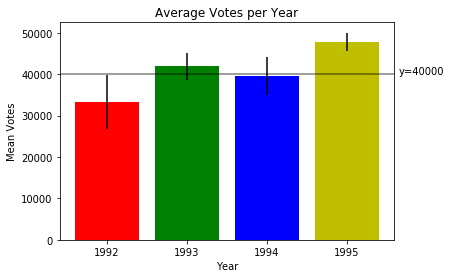

In [ ]:
plt.figure()
plt.bar(generic, mean, yerr=yerr, color='rgby')
plt.axhline(y=y, color = 'black', alpha=.5)
plt.text(3.65, y, 'y=%d' %y)
plt.xticks(generic, x)
plt.xlabel('Year')
plt.ylabel('Mean Votes')
plt.title('Average Votes per Year')
plt.show()

Harder Way

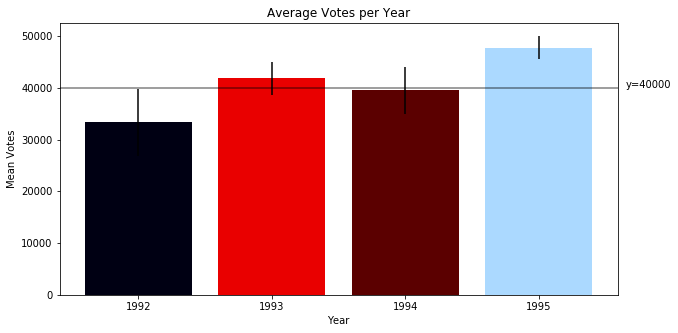

In [ ]:
#normalized the curve and used a colormap for the data.
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

norm = Normalize(vmin=-1.96, vmax=1.96)
#flag,prism,seismic,
cmap = get_cmap('flag')
df_c = pd.DataFrame(index = [0,1,2,3], columns = ['Value', 'Color'])

for i in range(0,4):
    df_c['Value'][i] = norm((mean[i]-y)/std[i])

df_c['Color'] = [cmap(x) for x in df_c['Value']]

plt.figure(figsize=(10,5))
plt.bar(generic, mean, yerr=yerr, color=df_c['Color'])
plt.axhline(y=y, color = 'black', alpha=.5)

plt.text(3.65, y, 'y=%d' %y)
plt.xticks(generic, x)
plt.xlabel('Year')
plt.ylabel('Mean Votes')
plt.title('Average Votes per Year')
plt.show()

Understanding Error Bars

A common error that learners run into with the week 3 assignment is looking at the error bars of the data rather than the error bars of the means of the data. These are very different, as the standard deviation of the means involves taking the square root of the number of samples.

This reading is intended to clarify the process required for assignment 3, with the demonstration based on the 1992 portion of the following data; we will create 1000 samples with a set random seed for reproducibility.   

In [ ]:
# Let's do the random sampling 1000 times for year 1992
np.random.seed(12345)
df_means = pd.DataFrame({'means':[np.random.normal(32000,200000,3650).mean() for i in range(1000)]})
df_means.head()

,means
0,33312.107476
1,29723.719082
2,26276.149916
3,31267.288484
4,31121.673831


In [ ]:
#Using the 1000 samples of means, we will now compute the standard deviation for 1992
df_means.std(axis=0)

means    3414.816232
dtype: float64

This standard deviation is that of the means (also known as the standard error), and is the standard deviation used for the error bars. Note that this is not the standard deviation of the data.

In [ ]:
#Using the above formula, we can calculate the standard error as follows:

# data standard deviation: 200000
# sample size: 3650
200000 / math.sqrt(3650)

3310.4235544094718

Standard error of mean versus standard deviation
In scientific and technical literature, experimental data are often summarized either using the mean and standard deviation of the sample data or the mean with the standard error. This often leads to confusion about their interchangeability. However, the mean and standard deviation are descriptive statistics, whereas the standard error of the mean is descriptive of the random sampling process. The standard deviation of the sample data is a description of the variation in measurements, while the standard error of the mean is a probabilistic statement about how the sample size will provide a better bound on estimates of the population mean, in light of the central limit theorem.[7]

Put simply, the standard error of the sample mean is an estimate of how far the sample mean is likely to be from the population mean, whereas the standard deviation of the sample is the degree to which individuals within the sample differ from the sample mean.[8] If the population standard deviation is finite, the standard error of the mean of the sample will tend to zero with increasing sample size, because the estimate of the population mean will improve, while the standard deviation of the sample will tend to approximate the population standard deviation as the sample size increases.